## Load the data, extract originals and labels

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import load_data
start_time = time.time()

originals, labels, count = load_data.process_rois('CS8_ROIs.csv', 'cellsuspensionED8/', 0)
print('count = ', count)

print("--- %s seconds ---" % (time.time() - start_time))

count =  883402
--- 4.701328754425049 seconds ---


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import load_data
start_time = time.time()

originals, labels, count = load_data.process_rois_2('CS12_ROIs.csv', 'cellsuspensionED12/', 0)
print('count = ', count)

print("--- %s seconds ---" % (time.time() - start_time))

In [2]:
labels = labels[:count, :]
print('labels shape: ', labels.shape)
originals = originals[: count, :, :]
print('originals shape: ', originals.shape)

labels shape:  (883402, 1)
originals shape:  (883402, 23, 23)


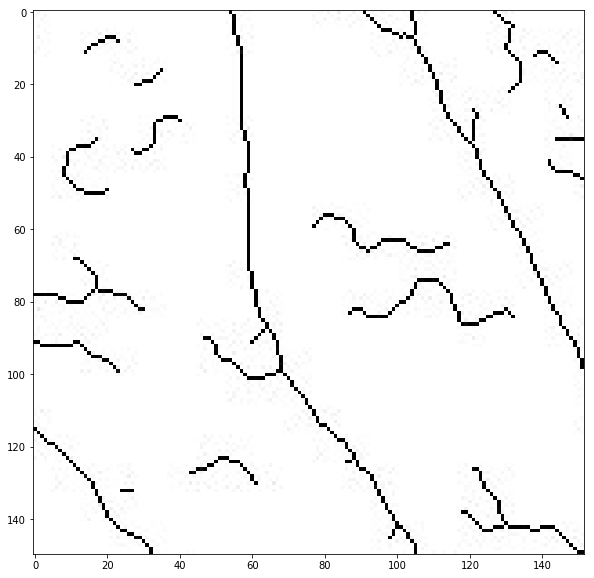

In [3]:
load_data.plot_skeleton(labels[252720:275520, 0], 172, 174, 23)

nrows = 7 ncols = 7 rem_i = 11 rem_j = 13 roi_height = 150 roi_width = 152
(22800, 23, 23)
(172, 174)


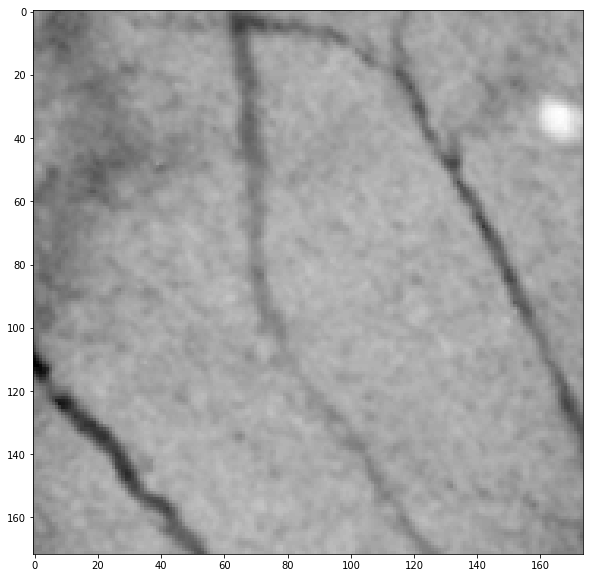

In [4]:
load_data.plot_patches(originals[252720:275520, : , :], 172, 174, 23)

In [ ]:
load_data.plot_patches_without_overlap(originals[:49, :, :], nrows = 7, ncols = 7, patch_size = 23)

In [ ]:
i = 0
plt.figure(figsize=(15, 10))
plt.subplot(141)
plt.imshow(originals[i, :, :], cmap = plt.cm.gray, interpolation = "nearest")
plt.subplot(142)
plt.imshow(originals[i+1, :, :], cmap = plt.cm.gray, interpolation = "nearest")
plt.subplot(143)
plt.imshow(originals[i+2, :, :], cmap = plt.cm.gray, interpolation = "nearest")
plt.subplot(144)
plt.imshow(originals[i+3, :, :], cmap = plt.cm.gray, interpolation = "nearest")

plt.figure(figsize=(15, 10))
plt.subplot(141)
plt.imshow(originals[i+4, :, :], cmap = plt.cm.gray, interpolation = "nearest")
plt.subplot(142)
plt.imshow(originals[i+5, :, :], cmap = plt.cm.gray, interpolation = "nearest")
plt.subplot(143)
plt.imshow(originals[i+6, :, :], cmap = plt.cm.gray, interpolation = "nearest")
plt.subplot(144)
plt.imshow(originals[i+7, :, :], cmap = plt.cm.gray, interpolation = "nearest")
plt.show()
print(originals[i:i+8, 11, 11])
labels[i:i+8]

In [ ]:
i = 2000
plt.figure(figsize=(15, 10))
plt.subplot(141)
plt.imshow(originals[i, :, :], cmap = plt.cm.gray, interpolation = "nearest")
plt.subplot(142)
plt.imshow(originals[i+1, :, :], cmap = plt.cm.gray, interpolation = "nearest")
plt.subplot(143)
plt.imshow(originals[i+2, :, :], cmap = plt.cm.gray, interpolation = "nearest")
plt.subplot(144)
plt.imshow(originals[i+3, :, :], cmap = plt.cm.gray, interpolation = "nearest")

plt.figure(figsize=(15, 10))
plt.subplot(141)
plt.imshow(originals[i+4, :, :], cmap = plt.cm.gray, interpolation = "nearest")
plt.subplot(142)
plt.imshow(originals[i+5, :, :], cmap = plt.cm.gray, interpolation = "nearest")
plt.subplot(143)
plt.imshow(originals[i+6, :, :], cmap = plt.cm.gray, interpolation = "nearest")
plt.subplot(144)
plt.imshow(originals[i+7, :, :], cmap = plt.cm.gray, interpolation = "nearest")
plt.show()
print(originals[i:i+8, 11, 11])
labels[i:i+8]

## Evaluate the data

In [ ]:
path = '/Users/vladarozova/Dropbox/PhD/angiogenesis/Anna\'s results/cellsuspensionED8/'
filename1 = 'egg2_1_blurred_skeletone.jpg'
filename2 = 'egg3_2_blurred_skeletone.jpg'
img1 = plt.imread(path + filename1)
img2 = plt.imread(path + filename2)
plt.subplot(121)
plt.imshow(img1)
plt.subplot(122)
plt.imshow(img2)
plt.show()

In [ ]:
plt.hist(labels, bins = 255)
plt.show()

## Create binary labels

In [ ]:
# TRUE if it's a vessel, otherwise FALSE
# For blurred labels
#binary_labels = 0 * (labels < 128) + 1 * (labels >= 128)
# For skeletones
binary_labels = 1 * (labels < 128) + 0 * (labels >= 128)
print(binary_labels.shape)
print(binary_labels[:8])
plt.hist(binary_labels, bins = 2)
plt.show()

In [ ]:
#n_neg = int(sum(binary_labels[:, 1]))
n_pos = int(sum(binary_labels))
n_neg = count - n_pos
print('Number of negative samples: ', n_neg)
print('Number of positive samples: ', n_pos)
print('Fraction of positive samples: ', n_pos / count * 100, '%')
new_ratio = 1
n_neg_new = int(new_ratio * n_pos)
print('Need to randomly choose ', n_neg_new, ' negative samples to make it', new_ratio, ': 1')

## Reduce the number of negative samples

In [ ]:
#neg_indeces = (np.where(binary_labels[:, 1] == 1))[0]
neg_indeces = (np.where(binary_labels == 0))[0]
np.random.shuffle(neg_indeces)
neg_indeces_new = neg_indeces[:n_neg_new]

## Create stratified training and test sets

In [ ]:
train_ratio = 0.8
n_samples = n_pos + n_neg_new

print(n_samples, n_pos, n_neg_new)
print('train: ', round(train_ratio * n_samples), ', test: ', round((1 - train_ratio) * n_samples))
print('Positive. y_train: ', round(train_ratio * n_pos), ', y_test: ', round((1 - train_ratio) * n_pos))
print('Negative. y_train: ', round(train_ratio * n_neg_new), ', y_test: ', round((1 - train_ratio) * n_neg_new))

In [ ]:
#pos_indeces = (np.where(binary_labels[:, 0] == 1))[0]
pos_indeces = (np.where(binary_labels == 1))[0]
np.random.shuffle(pos_indeces)
pos_indeces_train = pos_indeces[:round(train_ratio * n_pos)]
pos_indeces_test = pos_indeces[round(train_ratio * n_pos):]

neg_indeces_train = neg_indeces_new[:round(train_ratio * n_neg_new)]
neg_indeces_test = neg_indeces_new[round(train_ratio * n_neg_new):]

In [ ]:
train_indeces = np.append(pos_indeces_train, neg_indeces_train, axis=0)
np.random.shuffle(train_indeces)
X_train = originals[train_indeces, :, :]
#y_train = labels[train_indeces]
y_train = binary_labels[train_indeces]

test_indeces = np.append(pos_indeces_test, neg_indeces_test, axis = 0)
np.random.shuffle(test_indeces)
X_test = originals[test_indeces, :, :]
#y_test = labels[test_indeces]
y_test = binary_labels[test_indeces]

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
X_train.dtype

## Data standardization across all patches

In [ ]:
data_mean = np.mean(X_train)
data_sd = np.std(X_train, ddof = 1)
X_train_std = (X_train - data_mean) / data_sd
print('Training set has mean', data_mean, 'and s.d.', data_sd)
print('Standardized training set has mean', np.mean(X_train_std), 'and s.d.', np.std(X_train_std, ddof = 1))

In [ ]:
X_test_std = (X_test - data_mean) / data_sd
print('Test set has mean', np.mean(X_test), 'and s.d.', np.std(X_test, ddof = 1))
print('Standardized test set has mean', np.mean(X_test_std), 'and s.d.', np.std(X_test_std, ddof = 1))

In [ ]:
X_train_small = X_train_std[:100, :, :]
y_train_small = y_train[:100, :]
print(X_train_small.shape, y_train_small.shape)
print(y_train_small.sum())